In [2]:
import gc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
random.seed(7)

In [3]:
def ptime():
    print(datetime.datetime.now().time())
    return time.time()
start = ptime()
execution_time = ptime() - start
def ptime2(execution_time):
    print(f'{round(execution_time, 6)}s')
ptime2(execution_time)

21:53:43.313462
21:53:43.313838
0.000103s


In [4]:
def read_dataset():
    start = ptime()
    gc.collect()
    df = pd.read_csv('../data/train_small.csv')#change
    print(df.shape)
    df = df.dropna()
    print(df.shape)
    execution_time = ptime() - start
    ptime2(execution_time)
    return df

In [5]:
# def train_test_split(df, test_size=0.1):
#     match_ids = df['matchId'].unique().tolist()
#     train_size = int(len(match_ids) * (1 - test_size))
#     train_match_ids = random.sample(match_ids, train_size)

#     train = df[df['matchId'].isin(train_match_ids)]
#     test = df[-df['matchId'].isin(train_match_ids)]
    
#     return train, test

In [6]:
df = read_dataset()

21:55:42.686977
(444697, 29)
(444697, 29)
21:55:45.232744
2.545624s


In [8]:
df.shape

(444697, 29)

In [7]:
def reduce_mem_usage(df):
    start = ptime()
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.6f} MB'.format(start_mem))
    
    cols_to_drop = ['Id', 'groupId', 'matchId', 'winPlacePerc']
    features = [col for col in df.columns if col not in cols_to_drop]
    for col in features:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    
    execution_time = ptime() - start
    ptime2(execution_time)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.6f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [9]:
df = reduce_mem_usage(df)

21:56:21.401059
Memory usage of dataframe is 101.783066 MB
21:56:21.723764
0.322733s
Memory usage after optimization is: 34.351785 MB
Decreased by 66.2%


In [10]:
df.shape

(444697, 29)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444697 entries, 0 to 444696
Data columns (total 29 columns):
Id                 444697 non-null object
groupId            444697 non-null object
matchId            444697 non-null object
assists            444697 non-null int8
boosts             444697 non-null int8
damageDealt        444697 non-null float16
DBNOs              444697 non-null int8
headshotKills      444697 non-null int8
heals              444697 non-null int8
killPlace          444697 non-null int8
killPoints         444697 non-null int16
kills              444697 non-null int8
killStreaks        444697 non-null int8
longestKill        444697 non-null float16
matchDuration      444697 non-null int16
matchType          444697 non-null object
maxPlace           444697 non-null int8
numGroups          444697 non-null int8
rankPoints         444697 non-null int16
revives            444697 non-null int8
rideDistance       444697 non-null float16
roadKills          444697 non

In [12]:
# train, val = train_test_split(df, 0.1)

# With matchType

# Getting X AND Y

In [74]:
target = 'winPlacePerc'
cols_to_drop = ['Id', 'groupId', 'matchId', target]
cols_to_fit = [col for col in df.columns if col not in cols_to_drop]

In [75]:
# Separating X and y
X = df[cols_to_fit].values
y = df['winPlacePerc'].values
# y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)
print(train[cols_to_fit].columns.get_loc("matchType"))
# Encoding categorical data named matchType
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 12] = labelencoder_X_1.fit_transform(X[:, 12])
print(X.shape)
onehotencoder = OneHotEncoder(categorical_features = [12])
X = onehotencoder.fit_transform(X).toarray()
print(X.shape)
X = X[:, 1:] # removing first, so need to know first var name
print(X.shape)

(444697, 25)
(444697,)
12
(444697, 25)


/Users/axeljeremy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/axeljeremy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(444697, 40)
(444697, 39)


# Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

In [17]:
# Fitting XGBoost 
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Fitting XGBoost

In [77]:
start = ptime()
model_v1 = XGBRegressor()
model_v1.fit(X_train,y_train)
execution_time = ptime() - start
ptime2(execution_time)

01:03:35.275623
01:04:09.920113
34.644536s


In [47]:
def mae(X_to_test, y_to_test, model_to_test):
    start = ptime()
    y_pred_test = model_to_test.predict(X_to_test)
    mae =  mean_absolute_error(y_to_test, y_pred_test)
    execution_time = ptime() - start
    ptime2(execution_time)
    return mae

# MAE Training

In [78]:
mae_v1_train = mae(X_to_test=X_train, y_to_test= y_train,model_to_test=model_v1)
print(mae_v1_train)

01:04:13.153669
01:04:14.187931
1.034251s
0.06925197777684033


# MAE Test

In [79]:
mae_v1_test = mae(X_to_test=X_test, y_to_test=y_test,model_to_test=model_v1 )
print(mae_v1_test)

01:04:17.328290
01:04:17.462732
0.134457s
0.06939059569316042


# Plot model_v1

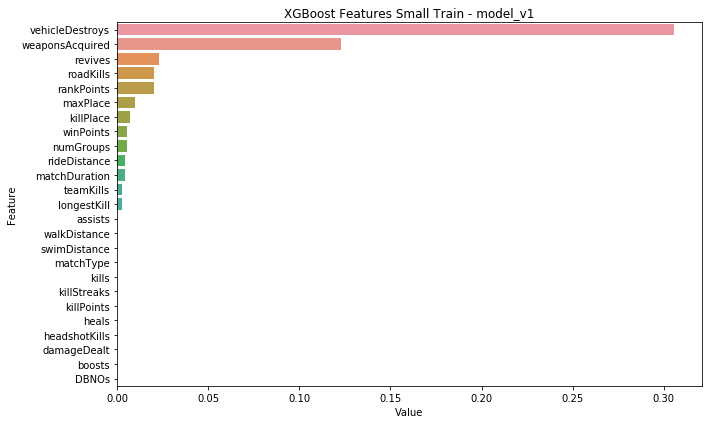

In [80]:
feature_importance = pd.DataFrame(sorted(zip(model_v1.feature_importances_, cols_to_fit)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features Small Train - model_v1')
plt.tight_layout()

# NEW XGBoost

In [52]:
target = 'winPlacePerc'
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType',target]
cols_to_fit = [col for col in df.columns if col not in cols_to_drop]

# Separating X and y
X = df[cols_to_fit].values
y = df['winPlacePerc'].values
# y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

start = ptime()
model_v12 = XGBRegressor(max_depth=10, learning_rate=0.5)
model_v12.fit(X_train,y_train)
execution_time = ptime() - start
ptime2(execution_time)

00:39:38.961324
00:41:55.124842
136.163507s


# MAE Training

In [53]:
mae_v12_train = mae(X_to_test=X_train, y_to_test= y_train,model_to_test=model_v12)
print(mae_v12_train)

00:43:14.506947
00:43:18.960182
4.453279s
0.04464940310593986


# MAE Test

In [54]:
mae_v12_test = mae(X_to_test=X_test, y_to_test=y_test,model_to_test=model_v12 )
print(mae_v12_test)

00:43:23.478323
00:43:23.953538
0.475269s
0.061193029129266586


# Plot model_v12

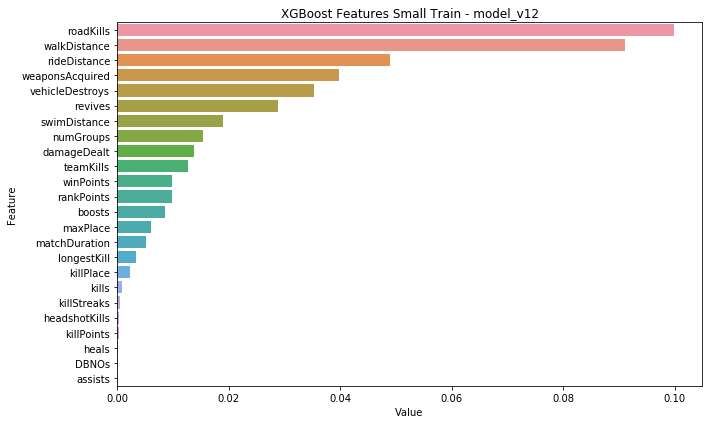

In [57]:
feature_importance = pd.DataFrame(sorted(zip(model_v12.feature_importances_, cols_to_fit)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features Small Train - model_v12')
plt.tight_layout()

# 




# With no matchType

# Getting X AND Y

In [55]:
target = 'winPlacePerc'
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType',target]
cols_to_fit = [col for col in df.columns if col not in cols_to_drop]

# Separating X and y
X = df[cols_to_fit].values
y = df['winPlacePerc'].values
# y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

(444697, 24)
(444697,)


# Splitting Dataset

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

# Fitting XGBoost

In [60]:
start = ptime()
model_v21 = XGBRegressor()
model_v21.fit(X_train,y_train)
execution_time = ptime() - start
ptime2(execution_time)

00:50:38.429705
00:51:07.215882
28.785959s


# MAE Train

In [61]:
mae_v21_train = mae(X_to_test=X_train, y_to_test= y_train,model_to_test=model_v21)
print(mae_v21_train)

00:51:46.288869
00:51:47.208338
0.919485s
0.06946676447117704


# MAE Test

In [62]:
mae_v21_test = mae(X_to_test=X_test, y_to_test=y_test,model_to_test=model_v21 )
print(mae_v21_test)

00:51:50.637113
00:51:50.758722
0.121426s
0.06963985991544555


# Feature Plot model_v21

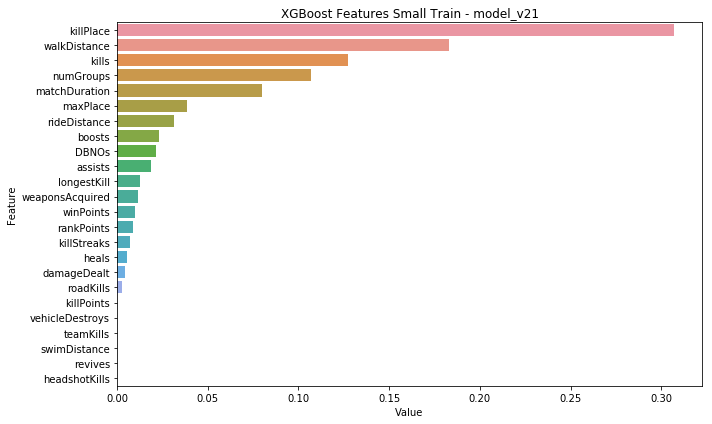

In [63]:
feature_importance = pd.DataFrame(sorted(zip(model_v21.feature_importances_, cols_to_fit)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features Small Train - model_v21')
plt.tight_layout()

# NEW XGBoost

In [68]:
start = ptime()
model_v22 = XGBRegressor(max_depth=10, learning_rate=0.5)
model_v22.fit(X_train,y_train)
execution_time = ptime() - start
ptime2(execution_time)

00:55:43.928025
00:57:22.799732
98.871691s


# MAE Train

In [69]:
mae_v22_train = mae(X_to_test=X_train, y_to_test= y_train,model_to_test=model_v22)
print(mae_v22_train)

01:01:39.708898
01:01:44.202427
4.493534s
0.04524507567687471


# MAE Test

In [70]:
mae_v22_test = mae(X_to_test=X_test, y_to_test=y_test,model_to_test=model_v22 )
print(mae_v22_test)

01:01:46.784825
01:01:47.269123
0.484228s
0.06193101354318066


# Feature Plot model_v22

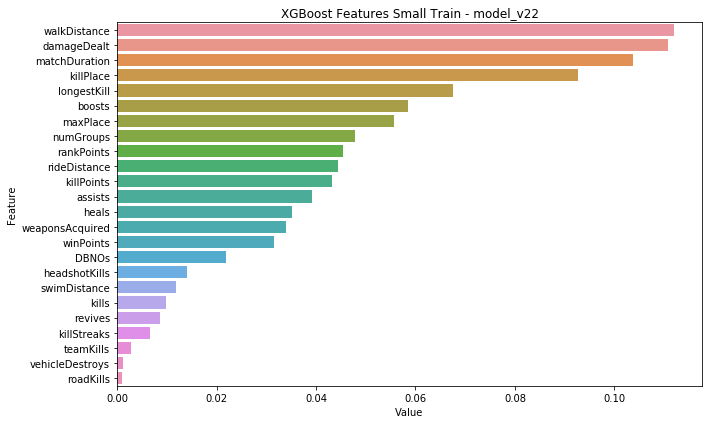

In [72]:
feature_importance = pd.DataFrame(sorted(zip(model_v22.feature_importances_, cols_to_fit)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features Small Train - model_v22')
plt.tight_layout()

In [84]:
print(model_v22)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [86]:
from sklearn.externals import joblib
# Save to file in the current working directory
joblib_file = "model_v22_normal.pkl"  
joblib.dump(model_v22, joblib_file)

joblib_file = "model_v21_normal.pkl"  
joblib.dump(model_v21, joblib_file)

joblib_file = "model_v1_normal.pkl"  
joblib.dump(model_v1, joblib_file)

joblib_file = "model_v12_normal.pkl"  
joblib.dump(model_v12, joblib_file)

# Load from file
# joblib_model = joblib.load(joblib_file)

['model_v12_normal.pkl']